### Major Test 2

#### Remittances

We shall be working with Overseas Filipino Remittance Data from the Banko Sentral ng Pilipinas (BSP) website.

http://www.bsp.gov.ph/statistics/efs_ext3.asp

I've already downloaded the Excel file containing Cash Remittance by Country and Source. Please download from the Canvas page for this test. Otherwise, here's the direct link:

http://www.bsp.gov.ph/statistics/excel/ofw.xls



In [1]:
import pandas as pd

By default, Pandas displays large numbers in scientific notation, which can get annoying. Let's disable it.


In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_excel("ofw.xls",sheet_name="Monthly 2019",skiprows=9)

In [4]:
df.columns[0:5]

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Drop the columns above

In [5]:
# drop first few columns
df.drop(columns=df.columns[0:5], inplace=True)

We have the following columns that we need to drop as well: 

In [6]:
unwanted_cols = ['Unnamed: 6','Unnamed: 19', 'Unnamed: 22', 'Rates (%)']

Drop them here

In [7]:
# write code here
df.drop(columns = unwanted_cols, inplace = True)

In [8]:
# check last few rows via tail() function
df.tail(10)

,Country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,2018,2019
929,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
930,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
931,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
932,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
933,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
934,NOTE: There are some limitations on the remit...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
935,correspondent banks mostly located in the U.S....,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
936,source and are lodged under the country where ...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
937,the main sources of OF remittances because ban...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
938,Source: Data are based on bank reports submi...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


## Clean/Remove unwanted rows

* Get rid of rows with all values `NaN`.
* Make sure footer text is gone as well, starting with rows 934 onwards as seen above.

Hint: https://datatofish.com/dropna/#:~:text=Step%202%3A%20Drop%20the%20Rows,dropna().&text=You%20may%20have%20noticed%20that,is%20currently%202%20and%204.


In [9]:
# dump

In [10]:
df.tail()

,Country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,2018,2019
934,NOTE: There are some limitations on the remit...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
935,correspondent banks mostly located in the U.S....,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
936,source and are lodged under the country where ...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
937,the main sources of OF remittances because ban...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
938,Source: Data are based on bank reports submi...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [11]:
df["Country"]

0                                                    NaN
1                                                    NaN
2                                                TOTAL 1
3                                              Landbased
4                                               Seabased
                             ...                        
934    NOTE:  There are some limitations on the remit...
935    correspondent banks mostly located in the U.S....
936    source and are lodged under the country where ...
937    the main sources of OF remittances because ban...
938    Source:   Data are based on bank reports submi...
Name: Country, Length: 939, dtype: object

In [12]:
# write code here to preserve output above for comparison
# drop last few rows

df = df.dropna(how="all").iloc[:-5]



In [13]:
df.tail()

,Country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,2018,2019
922,Landbased,112.13,108.17,44.05,33.62,33.81,67.47,96.55,92.56,84.07,13.48,9639.03,53.03,496.53,10377.98
923,Seabased,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.67,0.00,5.87,7.67
925,OTHERS 2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
926,Landbased,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
927,Seabased,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Now let's extract rows with countries aggregates (landbased + seabased) and exclude continent and grand total aggregates.

Useful Links:

https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

First, remove all rows containing "Landbased" and "Seabased" to leave the aggregate amounts.
NOTE that the values `Landbased` and `Seabased` have leading spaces, so you'll need to handle those.

In [14]:
# Extract Country Level Rows
# Hint: mind the leading spaces in Landbased and Seabased
# Make sure you reset the index to avoid confusion

# Dump df_country below
#df_country

In [15]:
# Write your code here to preserve the output above for comparison
df_country = df[~df.Country.str.strip().isin(["Landbased", "Seabased"])]

Dump the `Country` column where the values are in upper case as below. Note that all, except U.S.A. and "OTHERS 2" are non-country entries.

Hint for research: You may want to explore Pandas' Dataframe `str.isupper()` function.

In [16]:
# Write code here to preserve the output above for comparison
#df_country = df_country[~(df_country.Country.str.isupper() & ~df_country.Country.isin(["U.S.A.", "OTHERS 2"]))]

Quick Review: You can work with conditions to get a boolean Series indicating whether the row meets the condition or not.

In [17]:
# Run this cell
# Get all "Countries" with allcaps
df_country["Country"].str.isupper()

2       True
6       True
10     False
14     False
18     False
       ...  
909    False
913    False
917    False
921    False
925     True
Name: Country, Length: 231, dtype: bool

Remove all rows where Country is allcaps, BUT retain "U.S.A." and "OTHERS 2".  
Make a copy of the original dataset.  
Make sure you reset the Index. Do this in-place.   

In [18]:
# Remove all rows where Country is allcaps but retain "U.S.A." and OTHERS 2"
df_country=df_country[~df_country["Country"].str.isupper() | (df_country["Country"].isin(["U.S.A.","OTHERS 2"]))].copy()

df_country.reset_index(inplace=True,drop=True)

Dump the first 50 rows of the new df_country dataframe.  
Use INTERACTIVE (not script) mode.

In [19]:
# Write code here and preserve the output above for comparison.

df_country.iloc[:50]


,Country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,2018,2019
0,Afghanistan,108.88,61.98,96.17,67.21,107.52,54.55,122.99,73.30,93.30,79.94,82.87,82.33,1203.21,1031.04
1,Bangladesh,118.15,81.17,62.47,82.83,117.08,94.16,87.09,108.79,105.55,76.41,93.20,84.81,1022.44,1111.72
2,Bhutan,7.74,1.61,0.49,1.47,9.05,0.99,0.61,8.24,1.84,3.41,2.94,0.00,18.66,38.40
3,Brunei,3078.60,2624.26,2230.12,2266.23,2281.00,2210.82,3004.58,2331.52,2216.29,2100.28,1477.46,2359.77,29488.78,28180.93
4,China (Mainland),3462.43,1540.30,2220.22,2964.11,2847.71,3939.01,2471.67,2677.47,1953.97,2303.76,4326.92,2743.18,48213.59,33450.75
5,Hong Kong,70096.47,67745.22,74169.47,70606.71,63950.26,59207.35,56686.21,67029.91,62859.17,59621.12,63215.41,86561.82,845147.39,801749.13
6,India,2403.36,907.09,1773.05,672.66,997.32,673.85,784.36,865.47,661.80,639.63,687.02,844.16,12031.61,11909.77
7,Indonesia,3413.11,2992.04,1419.03,1431.81,1856.35,1090.14,1934.25,1285.47,1314.10,1431.31,1728.96,2381.51,23832.92,22278.08
8,Japan,125454.00,117243.76,125577.88,127351.55,118118.84,119463.66,123450.03,185665.43,143004.15,216874.37,181641.02,211538.72,1514206.53,1795383.39
9,Cambodia,543.18,1114.20,145.08,142.42,138.06,133.66,218.09,124.22,136.38,146.01,78.87,136.43,2019.72,3056.60


Before we proceed, let's make sure that the tallies match with what's originally in the spreadsheet.

Sum all values from January (Jan) to December (Dec) for all countries

In [20]:
# write code here to preserve the output above for comparison.
# dump in INTERACTIVE mode

df_country.loc[:,"Jan":"Dec"].sum(axis = 1)




0      1031.04
1      1111.72
2        38.40
3     28180.93
4     33450.75
        ...   
219     848.57
220    1641.58
221      25.83
222   10385.65
223       0.00
Length: 224, dtype: float64

The totals must match the numbers below

In [21]:
# Leave this untouched
df_country[2019]

0      1031.04
1      1111.72
2        38.40
3     28180.93
4     33450.75
        ...   
219     848.57
220    1641.58
221      25.83
222   10385.65
223       0.00
Name: 2019, Length: 224, dtype: float64

In [22]:
#comparing the values (small difference only)
(df_country[2019] - df_country.loc[:,"Jan":"Dec"].sum(axis = 1)).abs().max()

2.3283064365386963e-10

### Exploratory Data Analysis

Dump first 50 rows of the new country dataframe.

In [23]:
df_country[:50]

,Country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,2018,2019
0,Afghanistan,108.88,61.98,96.17,67.21,107.52,54.55,122.99,73.30,93.30,79.94,82.87,82.33,1203.21,1031.04
1,Bangladesh,118.15,81.17,62.47,82.83,117.08,94.16,87.09,108.79,105.55,76.41,93.20,84.81,1022.44,1111.72
2,Bhutan,7.74,1.61,0.49,1.47,9.05,0.99,0.61,8.24,1.84,3.41,2.94,0.00,18.66,38.40
3,Brunei,3078.60,2624.26,2230.12,2266.23,2281.00,2210.82,3004.58,2331.52,2216.29,2100.28,1477.46,2359.77,29488.78,28180.93
4,China (Mainland),3462.43,1540.30,2220.22,2964.11,2847.71,3939.01,2471.67,2677.47,1953.97,2303.76,4326.92,2743.18,48213.59,33450.75
5,Hong Kong,70096.47,67745.22,74169.47,70606.71,63950.26,59207.35,56686.21,67029.91,62859.17,59621.12,63215.41,86561.82,845147.39,801749.13
6,India,2403.36,907.09,1773.05,672.66,997.32,673.85,784.36,865.47,661.80,639.63,687.02,844.16,12031.61,11909.77
7,Indonesia,3413.11,2992.04,1419.03,1431.81,1856.35,1090.14,1934.25,1285.47,1314.10,1431.31,1728.96,2381.51,23832.92,22278.08
8,Japan,125454.00,117243.76,125577.88,127351.55,118118.84,119463.66,123450.03,185665.43,143004.15,216874.37,181641.02,211538.72,1514206.53,1795383.39
9,Cambodia,543.18,1114.20,145.08,142.42,138.06,133.66,218.09,124.22,136.38,146.01,78.87,136.43,2019.72,3056.60


Get total for January

In [24]:
# Total for January
#original value = 2483616.38

In [25]:
# write code here to compare
df_country.loc[:,"Jan"].sum()

2483616.3762899963

Compare the January Total above with the Januar total below

In [336]:
df.head()

,Country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,2018,2019
0,TOTAL 1,2483616.38,2300796.66,2514251.21,2440629.95,2609470.90,2289532.10,2580711.36,2589236.32,2379041.95,2671198.90,2372398.54,2902415.63,28943111.94,30133299.90
1,Landbased,1950660.36,1777129.76,1986976.43,1882317.47,2067203.55,1746442.48,2019111.85,2046178.19,1843590.15,2116563.65,1843825.25,2314054.96,22803599.61,23594054.11
2,Seabased,532956.02,523666.91,527274.77,558312.47,542267.35,543089.61,561599.51,543058.13,535451.80,554635.25,528573.29,588360.67,6139512.33,6539245.79
3,ASIA,522910.50,496885.35,535711.49,511625.72,515105.96,477955.79,504944.66,573566.45,543492.40,594181.62,562103.11,712279.81,5924412.92,6550762.85
4,Landbased,388416.65,365752.10,402910.16,370086.44,389474.20,348890.83,383089.27,452829.84,422983.53,481787.89,448723.96,571735.58,4529485.81,5026680.45


In [74]:
# Get Continent Totals
# Assume that the rows are those in df not included in df_country

df_continent = df[df.Country.str.isupper() & (~df.Country.isin(["U.S.A.", "OTHERS 2"]))].reset_index(drop=True)


In [75]:
# We don't need the TOTAL 1 Row; Remove it
df_continent = df_continents[df_continents.Country != "TOTAL 1"]



In [350]:
df_continent

,Country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,2018,2019
1,ASIA,522910.50,496885.35,535711.49,511625.72,515105.96,477955.79,504944.66,573566.45,543492.40,594181.62,562103.11,712279.81,5924412.92,6550762.85
2,A M E R I C A S,1003695.11,924417.26,979385.11,1050008.39,1076548.76,995526.48,1132650.06,1091932.55,1080490.22,1151403.44,1030704.53,1172022.23,11296425.08,12688784.14
3,O C E A N I A,75279.70,63183.22,73503.85,64976.81,72834.83,62857.45,69381.61,67049.21,67053.42,59407.99,48870.86,63154.11,804027.37,787553.06
4,E U R O P E,344848.27,325420.69,341620.66,330085.03,334714.85,346176.34,341567.50,320379.69,274525.40,337572.49,302025.60,380438.24,4153280.73,3979374.79
5,MIDDLE EAST,522893.15,478525.47,572987.11,474569.56,597357.85,396507.51,518314.15,526697.62,399975.11,517276.27,407686.27,559251.46,6617315.03,5972041.52
6,A F R I C A,13989.64,12364.68,11042.98,9364.43,12908.66,10508.53,13853.38,9610.79,13505.42,11357.09,21008.17,15269.77,147650.81,154783.54


### Basic Queries

What are the top three (3) remittance months for the United States?

Do not forget to remove 2018 and 2019 columns.

Work with copies (via .copy()) instead of assigning the original dataframe

Hints:
* Use Pandas Dataframe `transpose()`
* Don't forget to set inplace as needed

Sources:  
Drop rows by index:
https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe

In [504]:


# dump top three remittance months


,remittances
Dec,1045117.86
Oct,1037423.16
Jul,1014950.06


In [67]:
# write code here to preserve the output above for comparison
df_country[df_country.Country == "U.S.A."].loc[:,"Jan":"Dec"].T.rename(columns = {67:"remittances"}).sort_values(by="remittances", ascending = False).iloc[:3]

,remittances
Dec,1045117.86
Oct,1037423.16
Jul,1014950.06


In [115]:
df_USA = df_country[df_country.Country == "U.S.A."].loc[:,"Jan":"Dec"].T.rename(columns = {67:"remittances"}).sort_values(by = "remittances", ascending = False)


Essay Side question:

What insights can you share from your findings above? Please write your answer in Markdown below

OFWs from the US send more money home in December and October probably for Christmas expenses, and in July probably to prepare for school opening. 

### Prepare for Data Visualization

Sort country dataframe by remittance value (2019) in descending order

In [72]:
# Top 10 Countries by Remittance Amount (2019)
df_country_sorted = df_country[["Country",2019]].sort_values(by = 2019, ascending = False).iloc[:10]

In [343]:
df_country_sorted

,Country,2019
66,U.S.A.,11318335.36
162,Saudi Arabia,2098287.42
21,Singapore,1906494.48
8,Japan,1795383.39
164,United Arab Emirates,1592453.03
...,...,...
163,Syria,0.00
188,Irian (West/Barat),0.00
34,British West Indies,0.00
182,French West Africa,0.00


Sort Continent dataframe by remittance value in descending order

In [76]:
df_continent

,Country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,2018,2019
1,ASIA,522910.50,496885.35,535711.49,511625.72,515105.96,477955.79,504944.66,573566.45,543492.40,594181.62,562103.11,712279.81,5924412.92,6550762.85
2,A M E R I C A S,1003695.11,924417.26,979385.11,1050008.39,1076548.76,995526.48,1132650.06,1091932.55,1080490.22,1151403.44,1030704.53,1172022.23,11296425.08,12688784.14
3,O C E A N I A,75279.70,63183.22,73503.85,64976.81,72834.83,62857.45,69381.61,67049.21,67053.42,59407.99,48870.86,63154.11,804027.37,787553.06
4,E U R O P E,344848.27,325420.69,341620.66,330085.03,334714.85,346176.34,341567.50,320379.69,274525.40,337572.49,302025.60,380438.24,4153280.73,3979374.79
5,MIDDLE EAST,522893.15,478525.47,572987.11,474569.56,597357.85,396507.51,518314.15,526697.62,399975.11,517276.27,407686.27,559251.46,6617315.03,5972041.52
6,A F R I C A,13989.64,12364.68,11042.98,9364.43,12908.66,10508.53,13853.38,9610.79,13505.42,11357.09,21008.17,15269.77,147650.81,154783.54


In [78]:
# write code here
df_continent_sorted = df_continent[["Country",2019]].sort_values(by = 2019, ascending = False).iloc[:10]

In [362]:
# dump
df_continent_sorted

,Country,2019
2,A M E R I C A S,12688784.14
1,ASIA,6550762.85
5,MIDDLE EAST,5972041.52
4,E U R O P E,3979374.79
3,O C E A N I A,787553.06
6,A F R I C A,154783.54


### Data Visualization

Specifications:
* Figure consists of 1 row by 2 columns
* Figure size is 12 inches x 20 inches
* Amounts must be in thousands (so you'll have to divide by 1000)

Useful links:  
https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

In [81]:
import matplotlib.pyplot as plt

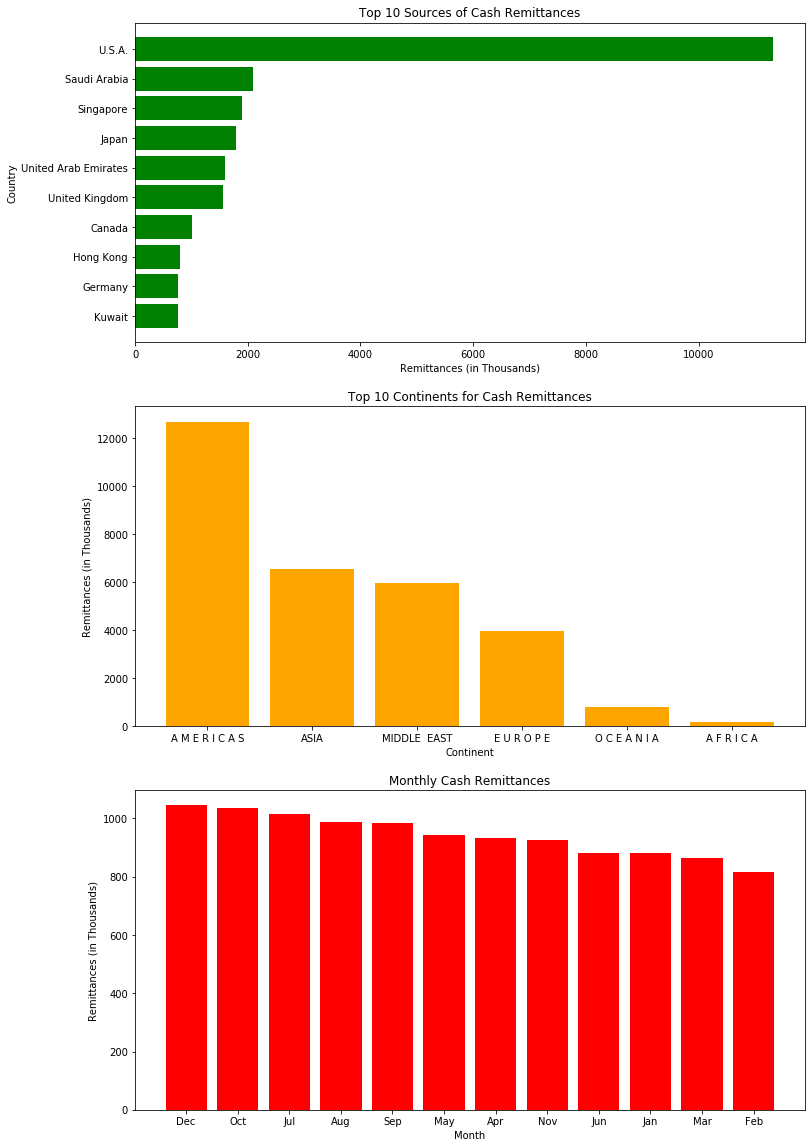

In [520]:
# Make a 1x3 Figure
%matplotlib inline 



# First Graph
# Horizontal Bar Graph
# Bar color: Green ("Green")


# Second Graph
# Vertical Bar
# Bar Color: Orange ("Orange")


# Third Graph


# show plot

plt.show()


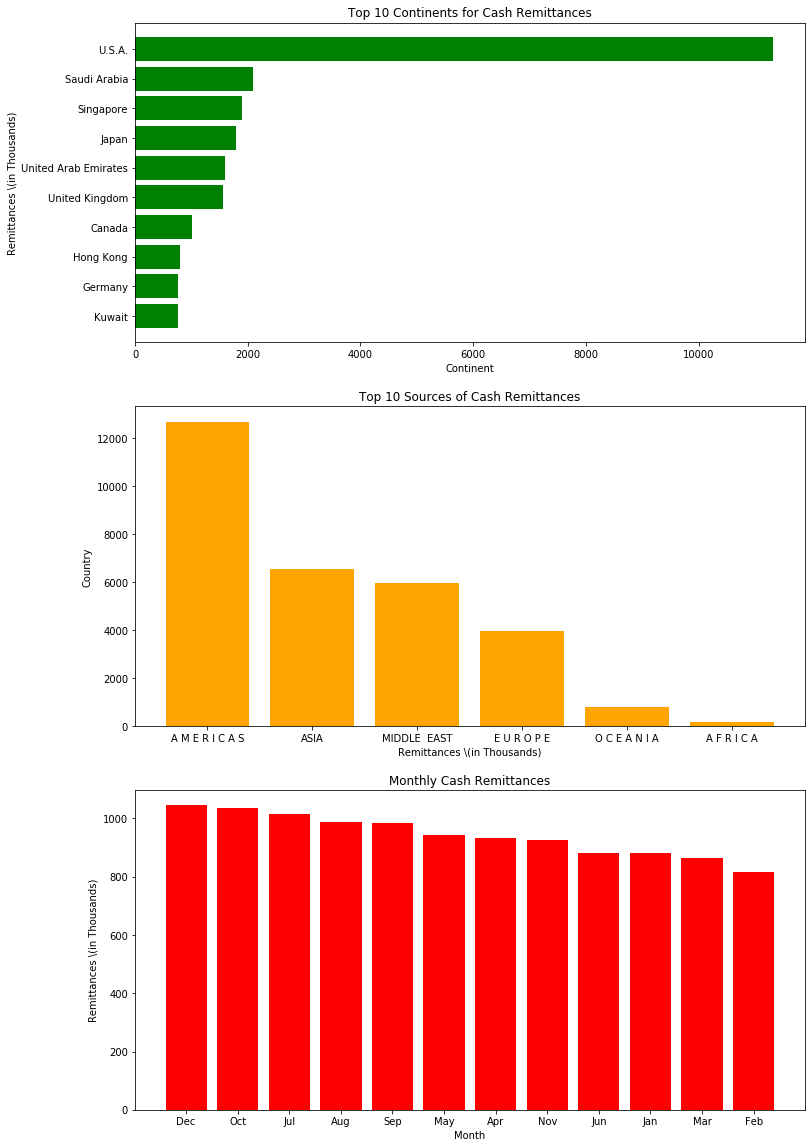

In [117]:
# Write code here

fig,axs = plt.subplots(3,1,figsize = (12,20))
#plt.figure(figsize = (12,20))

# First Graph
# Horizontal Bar Graph
# Bar color: Green ("Green")
axs[0].barh(df_country_sorted.Country.iloc[::-1],df_country_sorted[2019].iloc[::-1]/1000, color = "green")
axs[0].set_title("Top 10 Continents for Cash Remittances")
axs[0].set_xlabel("Continent")
axs[0].set_ylabel("Remittances \(in Thousands)")

# Second Graph
# Vertical Bar
# Bar Color: Orange ("Orange")
axs[1].bar(df_continent_sorted.Country,df_continent_sorted[2019]/1000, color = "orange")
axs[1].set_title("Top 10 Sources of Cash Remittances")
axs[1].set_xlabel("Remittances \(in Thousands)")
axs[1].set_ylabel("Country")
# Third Graph
axs[2].bar(df_USA.index,df_USA.remittances/1000, color = "red")
axs[2].set_title("Monthly Cash Remittances")
axs[2].set_xlabel("Month")
axs[2].set_ylabel("Remittances \(in Thousands)")
plt.show()